In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os

##### Reading & Merging 12 months of sales data provided

In [3]:
files = [file for file in os.listdir("../datasets/Sales_Data")]
data_path = "../datasets/Sales_Data/"
combined_df = pd.DataFrame()
for file in files:
    sale_df = pd.read_csv(data_path + file)
    combined_df = pd.concat([combined_df, sale_df])
    print(combined_df.shape)

(18383, 6)
(30394, 6)
(55511, 6)
(67547, 6)
(77270, 6)
(91641, 6)
(105263, 6)
(120489, 6)
(137124, 6)
(154785, 6)
(175164, 6)
(186850, 6)


In [4]:
combined_df.isna().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [5]:
combined_df.dropna(inplace=True)

In [6]:
combined_df.isna().sum()
combined_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [7]:
combined_df.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

In [8]:
from datetime import datetime

In [9]:
# To search for non-datetime var
for i in combined_df['Order Date'].unique():
    try:
        test = datetime.strptime(i, '%m/%d/%y %H:%M')
    except: 
        print(i)

Order Date


In [10]:
combined_df[combined_df['Order Date'] == "Order Date"]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2878,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2893,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
...,...,...,...,...,...,...
10000,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
10387,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
11399,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
11468,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [11]:
# Remove rows that have Order Date in Order Date col
combined_df = combined_df[combined_df['Order Date'] != "Order Date"]

In [12]:
# Verify removal complete
combined_df[combined_df['Order Date'] == "Order Date"]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [13]:
combined_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [14]:
combined_df['Order Date'] = combined_df['Order Date'].astype('datetime64[ns]')

In [15]:
combined_df.dtypes

Order ID                    object
Product                     object
Quantity Ordered            object
Price Each                  object
Order Date          datetime64[ns]
Purchase Address            object
dtype: object

In [17]:
combined_df['Order Date'].dt.month

0        4
2        4
3        4
4        4
5        4
        ..
11681    9
11682    9
11683    9
11684    9
11685    9
Name: Order Date, Length: 185950, dtype: int64

In [18]:
combined_df['Month'] = combined_df['Order Date'].dt.month
combined_df['Year'] = combined_df['Order Date'].dt.year


In [20]:
combined_df.dtypes

Order ID                    object
Product                     object
Quantity Ordered            object
Price Each                  object
Order Date          datetime64[ns]
Purchase Address            object
Month                        int64
Year                         int64
dtype: object

In [23]:
combined_df['Price Each'] = combined_df['Price Each'].astype(float)
combined_df['Quantity Ordered'] = combined_df['Quantity Ordered'].astype(int) 


In [24]:
combined_df['Sales'] = combined_df['Price Each'] * combined_df['Quantity Ordered']

In [25]:
combined_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Year,Sales
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,2019,23.90
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,2019,99.99
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,2019,600.00
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,2019,11.99
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,2019,11.99


In [27]:
combined_df.Year.unique()

array([2019, 2020], dtype=int64)

In [26]:
year_grp = combined_df.groupby(['Year'])

In [29]:
y2k19 = year_grp.get_group(2019)

In [30]:
mth_grp_2k19 = y2k19.groupby(['Month'])

In [39]:
mth_grp_2k19['Sales'].sum()

Month
1     1813586.44
2     2202022.42
3     2807100.38
4     3390670.24
5     3152606.75
6     2577802.26
7     2647775.76
8     2244467.88
9     2097560.13
10    3736726.88
11    3199603.20
12    4613443.34
Name: Sales, dtype: float64

Text(0.5, 0, 'Months')

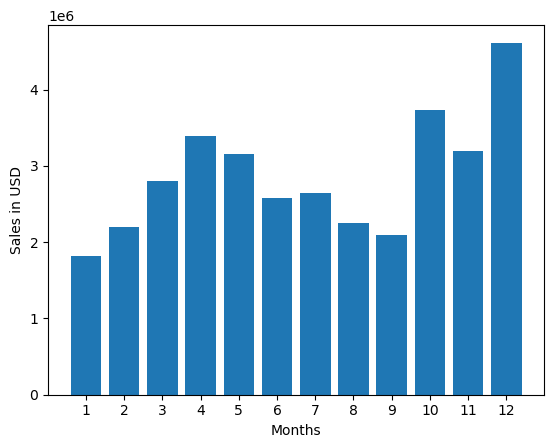

In [52]:
plt.bar(x = sorted(y2k19.Month.unique()), height = mth_grp_2k19['Sales'].sum())
plt.xticks(sorted(y2k19.Month.unique()));
plt.ylabel("Sales in USD")
plt.xlabel("Months")

In [70]:
combined_df[['Street', 'City', 'Postal']] = combined_df['Purchase Address'].str.split(',', expand=True)


In [71]:
combined_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Year,Sales,Street,City,Postal
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,2019,23.90,917 1st St,Dallas,TX 75001
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,2019,99.99,682 Chestnut St,Boston,MA 02215
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,2019,600.00,669 Spruce St,Los Angeles,CA 90001
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,2019,11.99,669 Spruce St,Los Angeles,CA 90001
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,2019,11.99,333 8th St,Los Angeles,CA 90001


In [74]:
combined_df['City'].unique()

array([' Dallas', ' Boston', ' Los Angeles', ' San Francisco', ' Seattle',
       ' Atlanta', ' New York City', ' Portland', ' Austin'], dtype=object)

In [76]:
city_grp = combined_df.groupby(['City'])eeeeeeeeeeeee

C:\Users\leowj\AppData\Local\Temp\ipykernel_9352\1085108264.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  city_grp.sum()['Sales'].sort_values().plot(kind='bar')


<Axes: xlabel='City'>

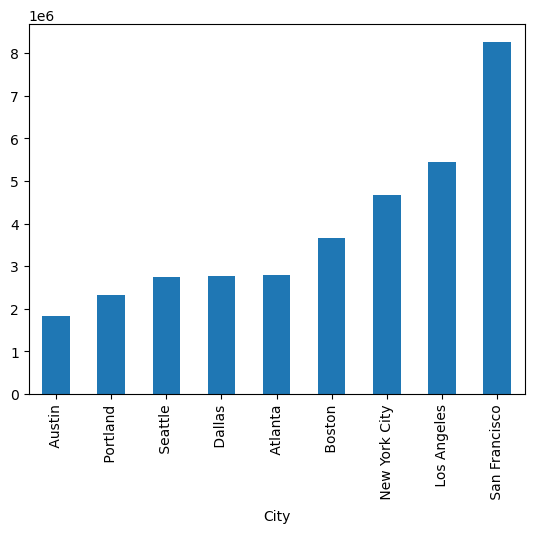

In [100]:
city_grp.sum()['Sales'].sort_values().plot(kind='bar')